'''1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining'''


In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chaur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data collection and description
###Connecting to Amazon and download reviews

In [3]:
# creating empty reviews list
oneplus_reviews=[]
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [4]:
oneplus_reviews

['\nDesign – A Familiar Face With a Dash of NewLet’s start with the design. Users of older Oneplus phones will instantly recognize the front side of the phone. It has the same teardrop notch that the company has provided in every phone since the Oneplus 6T. And honestly, it doesn’t bother me at all. A notch-less design would have been appreciated, but that’s reserved for the “Pro” model.But here’s the big twist- rounded triple-camera layout. Remember Motorola? That’s exactly what the Oneplus 7T looks like, and the “Triple Lens” carved right above the, well, triple-lens system, doesn’t help. At its best, it helps in distinguishing itself from the rest of the lineup. At worst, it sticks out, literally, like a sore thumb. That’s not to say that I haven’t grown into it, but given the Oneplus 7T Pro’s more predictable design, it does get me to ask “Why did Oneplus make it look like this?”The phone sports a single USB-C port which is used for charging using Warp CHarge 30T. The latest update

In [5]:
len(oneplus_reviews)

260

In [6]:
oneplus_reviews = list(set(oneplus_reviews))

In [7]:
oneplus_reviews

['\nDesign – A Familiar Face With a Dash of NewLet’s start with the design. Users of older Oneplus phones will instantly recognize the front side of the phone. It has the same teardrop notch that the company has provided in every phone since the Oneplus 6T. And honestly, it doesn’t bother me at all. A notch-less design would have been appreciated, but that’s reserved for the “Pro” model.But here’s the big twist- rounded triple-camera layout. Remember Motorola? That’s exactly what the Oneplus 7T looks like, and the “Triple Lens” carved right above the, well, triple-lens system, doesn’t help. At its best, it helps in distinguishing itself from the rest of the lineup. At worst, it sticks out, literally, like a sore thumb. That’s not to say that I haven’t grown into it, but given the Oneplus 7T Pro’s more predictable design, it does get me to ask “Why did Oneplus make it look like this?”The phone sports a single USB-C port which is used for charging using Warp CHarge 30T. The latest update

In [8]:
len(oneplus_reviews)

10

### Cleaning the text

In [9]:
txt_upd = ' '.join(oneplus_reviews)
len(txt_upd)

41761

In [10]:
txt_upd

'\nDesign – A Familiar Face With a Dash of NewLet’s start with the design. Users of older Oneplus phones will instantly recognize the front side of the phone. It has the same teardrop notch that the company has provided in every phone since the Oneplus 6T. And honestly, it doesn’t bother me at all. A notch-less design would have been appreciated, but that’s reserved for the “Pro” model.But here’s the big twist- rounded triple-camera layout. Remember Motorola? That’s exactly what the Oneplus 7T looks like, and the “Triple Lens” carved right above the, well, triple-lens system, doesn’t help. At its best, it helps in distinguishing itself from the rest of the lineup. At worst, it sticks out, literally, like a sore thumb. That’s not to say that I haven’t grown into it, but given the Oneplus 7T Pro’s more predictable design, it does get me to ask “Why did Oneplus make it look like this?”The phone sports a single USB-C port which is used for charging using Warp CHarge 30T. The latest update 

In [11]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [12]:
text_tokens = word_tokenize(txt_upd)

In [13]:
text_tokens

['design',
 'a',
 'familiar',
 'face',
 'with',
 'a',
 'dash',
 'of',
 'newlet',
 's',
 'start',
 'with',
 'the',
 'design',
 'users',
 'of',
 'older',
 'oneplus',
 'phones',
 'will',
 'instantly',
 'recognize',
 'the',
 'front',
 'side',
 'of',
 'the',
 'phone',
 'it',
 'has',
 'the',
 'same',
 'teardrop',
 'notch',
 'that',
 'the',
 'company',
 'has',
 'provided',
 'in',
 'every',
 'phone',
 'since',
 'the',
 'oneplus',
 't',
 'and',
 'honestly',
 'it',
 'doesn',
 't',
 'bother',
 'me',
 'at',
 'all',
 'a',
 'notch',
 'less',
 'design',
 'would',
 'have',
 'been',
 'appreciated',
 'but',
 'that',
 's',
 'reserved',
 'for',
 'the',
 'pro',
 'model',
 'but',
 'here',
 's',
 'the',
 'big',
 'twist',
 'rounded',
 'triple',
 'camera',
 'layout',
 'remember',
 'motorola',
 'that',
 's',
 'exactly',
 'what',
 'the',
 'oneplus',
 't',
 'looks',
 'like',
 'and',
 'the',
 'triple',
 'lens',
 'carved',
 'right',
 'above',
 'the',
 'well',
 'triple',
 'lens',
 'system',
 'doesn',
 't',
 'help',


In [14]:
len(text_tokens)

7613

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewsv=cv.fit_transform(text_tokens)
print(cv.vocabulary_)

{'design': 328, 'familiar': 449, 'face': 440, 'with': 1458, 'dash': 303, 'of': 874, 'newlet': 845, 'start': 1223, 'the': 1297, 'users': 1389, 'older': 888, 'oneplus': 893, 'phones': 948, 'will': 1453, 'instantly': 646, 'recognize': 1056, 'front': 501, 'side': 1150, 'phone': 947, 'it': 664, 'has': 575, 'same': 1102, 'teardrop': 1278, 'notch': 857, 'that': 1295, 'company': 252, 'provided': 1017, 'in': 632, 'every': 419, 'since': 1159, 'and': 52, 'honestly': 606, 'doesn': 355, 'bother': 141, 'me': 773, 'at': 87, 'all': 34, 'less': 710, 'would': 1470, 'have': 578, 'been': 117, 'appreciated': 70, 'but': 167, 'reserved': 1075, 'for': 491, 'pro': 1003, 'model': 802, 'here': 595, 'big': 126, 'twist': 1354, 'rounded': 1093, 'triple': 1343, 'camera': 184, 'layout': 698, 'remember': 1072, 'motorola': 815, 'exactly': 424, 'what': 1437, 'looks': 733, 'like': 717, 'lens': 709, 'carved': 193, 'right': 1086, 'above': 3, 'well': 1433, 'system': 1261, 'help': 591, 'its': 665, 'best': 123, 'helps': 593, 

In [20]:
print(cv.get_feature_names_out()[200:300])

['centric' 'cents' 'certain' 'certification' 'certified' 'change'
 'changer' 'charge' 'charged' 'charger' 'chargers' 'charges' 'charging'
 'chassis' 'cheaper' 'check' 'checking' 'checkout' 'chip' 'chips'
 'chipset' 'choose' 'cinematic' 'circular' 'claims' 'clarity' 'classify'
 'classy' 'clean' 'clear' 'clearly' 'click' 'clicking' 'close' 'closer'
 'closes' 'clumsy' 'cm' 'co' 'cod' 'color' 'colors' 'colour' 'colours'
 'combination' 'combined' 'combining' 'come' 'comes' 'comfortable'
 'coming' 'community' 'company' 'comparable' 'compared' 'comparison'
 'competitors' 'complain' 'complained' 'complaints' 'complete'
 'complimentary' 'con' 'conclusion' 'conditions' 'confidently' 'cons'
 'consider' 'considering' 'consistency' 'consists' 'constantly' 'content'
 'continues' 'continuous' 'continuously' 'contrast' 'control' 'converter'
 'cooked' 'corners' 'costs' 'could' 'couldn' 'couple' 'courteous' 'cover'
 'covered' 'covid' 'crack' 'crevasse' 'crop' 'crowdnow' 'current'
 'currently' 'curved' '

In [21]:
print(reviewsv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(reviewsv.toarray().shape)

(7613, 1486)


# CountVectorizer with N-grams (Bigrams & Trigrams)

In [23]:
# Bigrams means it will check two words continuously and count verctories on them.
#Trigrams means it will check three words continuously and count verctories on them

In [24]:
cv_ngram_range=CountVectorizer(analyzer="word",ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(text_tokens) #bow means bag of words

In [25]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())#it will create bow matrix

['about' 'after' 'all' 'also' 'an' 'and' 'android' 'any' 'are' 'as' 'at'
 'back' 'battery' 'be' 'been' 'but' 'by' 'camera' 'cameras' 'can' 'case'
 'charging' 'comes' 'design' 'device' 'display' 'even' 'fast' 'features'
 'feel' 'for' 'from' 'good' 'great' 'has' 'have' 'hours' 'hz' 'if' 'in'
 'is' 'issues' 'it' 'its' 'just' 'like' 'me' 'mode' 'more' 'mp' 'much'
 'my' 'no' 'not' 'now' 'of' 'on' 'one' 'oneplus' 'only' 'or' 'other' 'out'
 'oxygen' 'phone' 'phones' 'price' 'pro' 're' 'really' 'review' 'say'
 'screen' 'so' 'software' 'speakers' 'still' 'than' 'that' 'the' 'then'
 'there' 'they' 'this' 'time' 'to' 'up' 'use' 'used' 'using' 'very' 'was'
 'well' 'when' 'which' 'while' 'will' 'with' 'would' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TF-IDF Vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_ngram_max_feature=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix=tfidf_ngram_max_feature.fit_transform(text_tokens)

In [27]:
print(tfidf_ngram_max_feature.get_feature_names_out())
print(tfidf_matrix.toarray())

['about' 'above' 'actually' 'adds' 'after' 'again' 'alert' 'all' 'almost'
 'also' 'although' 'always' 'am' 'amazing' 'amoled' 'an' 'and' 'android'
 'animations' 'another' 'any' 'app' 'apple' 'applied' 'apps' 'are'
 'around' 'as' 'at' 'avail' 'available' 'average' 'back' 'background'
 'backup' 'battery' 'be' 'because' 'been' 'before' 'being' 'best' 'better'
 'between' 'big' 'bit' 'blazing' 'blue' 'body' 'both' 'bottom' 'bought'
 'box' 'brightness' 'budget' 'built' 'but' 'buy' 'buyers' 'buying' 'by'
 'call' 'came' 'camera' 'cameras' 'can' 'care' 'case' 'certain' 'change'
 'charge' 'charged' 'charger' 'charging' 'check' 'chipset' 'clear' 'close'
 'color' 'colors' 'colour' 'comes' 'coming' 'company' 'compared'
 'comparison' 'competitors' 'cons' 'consider' 'considering' 'content'
 'continues' 'converter' 'could' 'current' 'curved' 'customer' 'data'
 'day' 'days' 'decent' 'default' 'definitely' 'design' 'detailed' 'device'
 'devices' 'did' 'didn' 'difference' 'display' 'do' 'does' 'doesn' 'd

# Generate Word Cloud

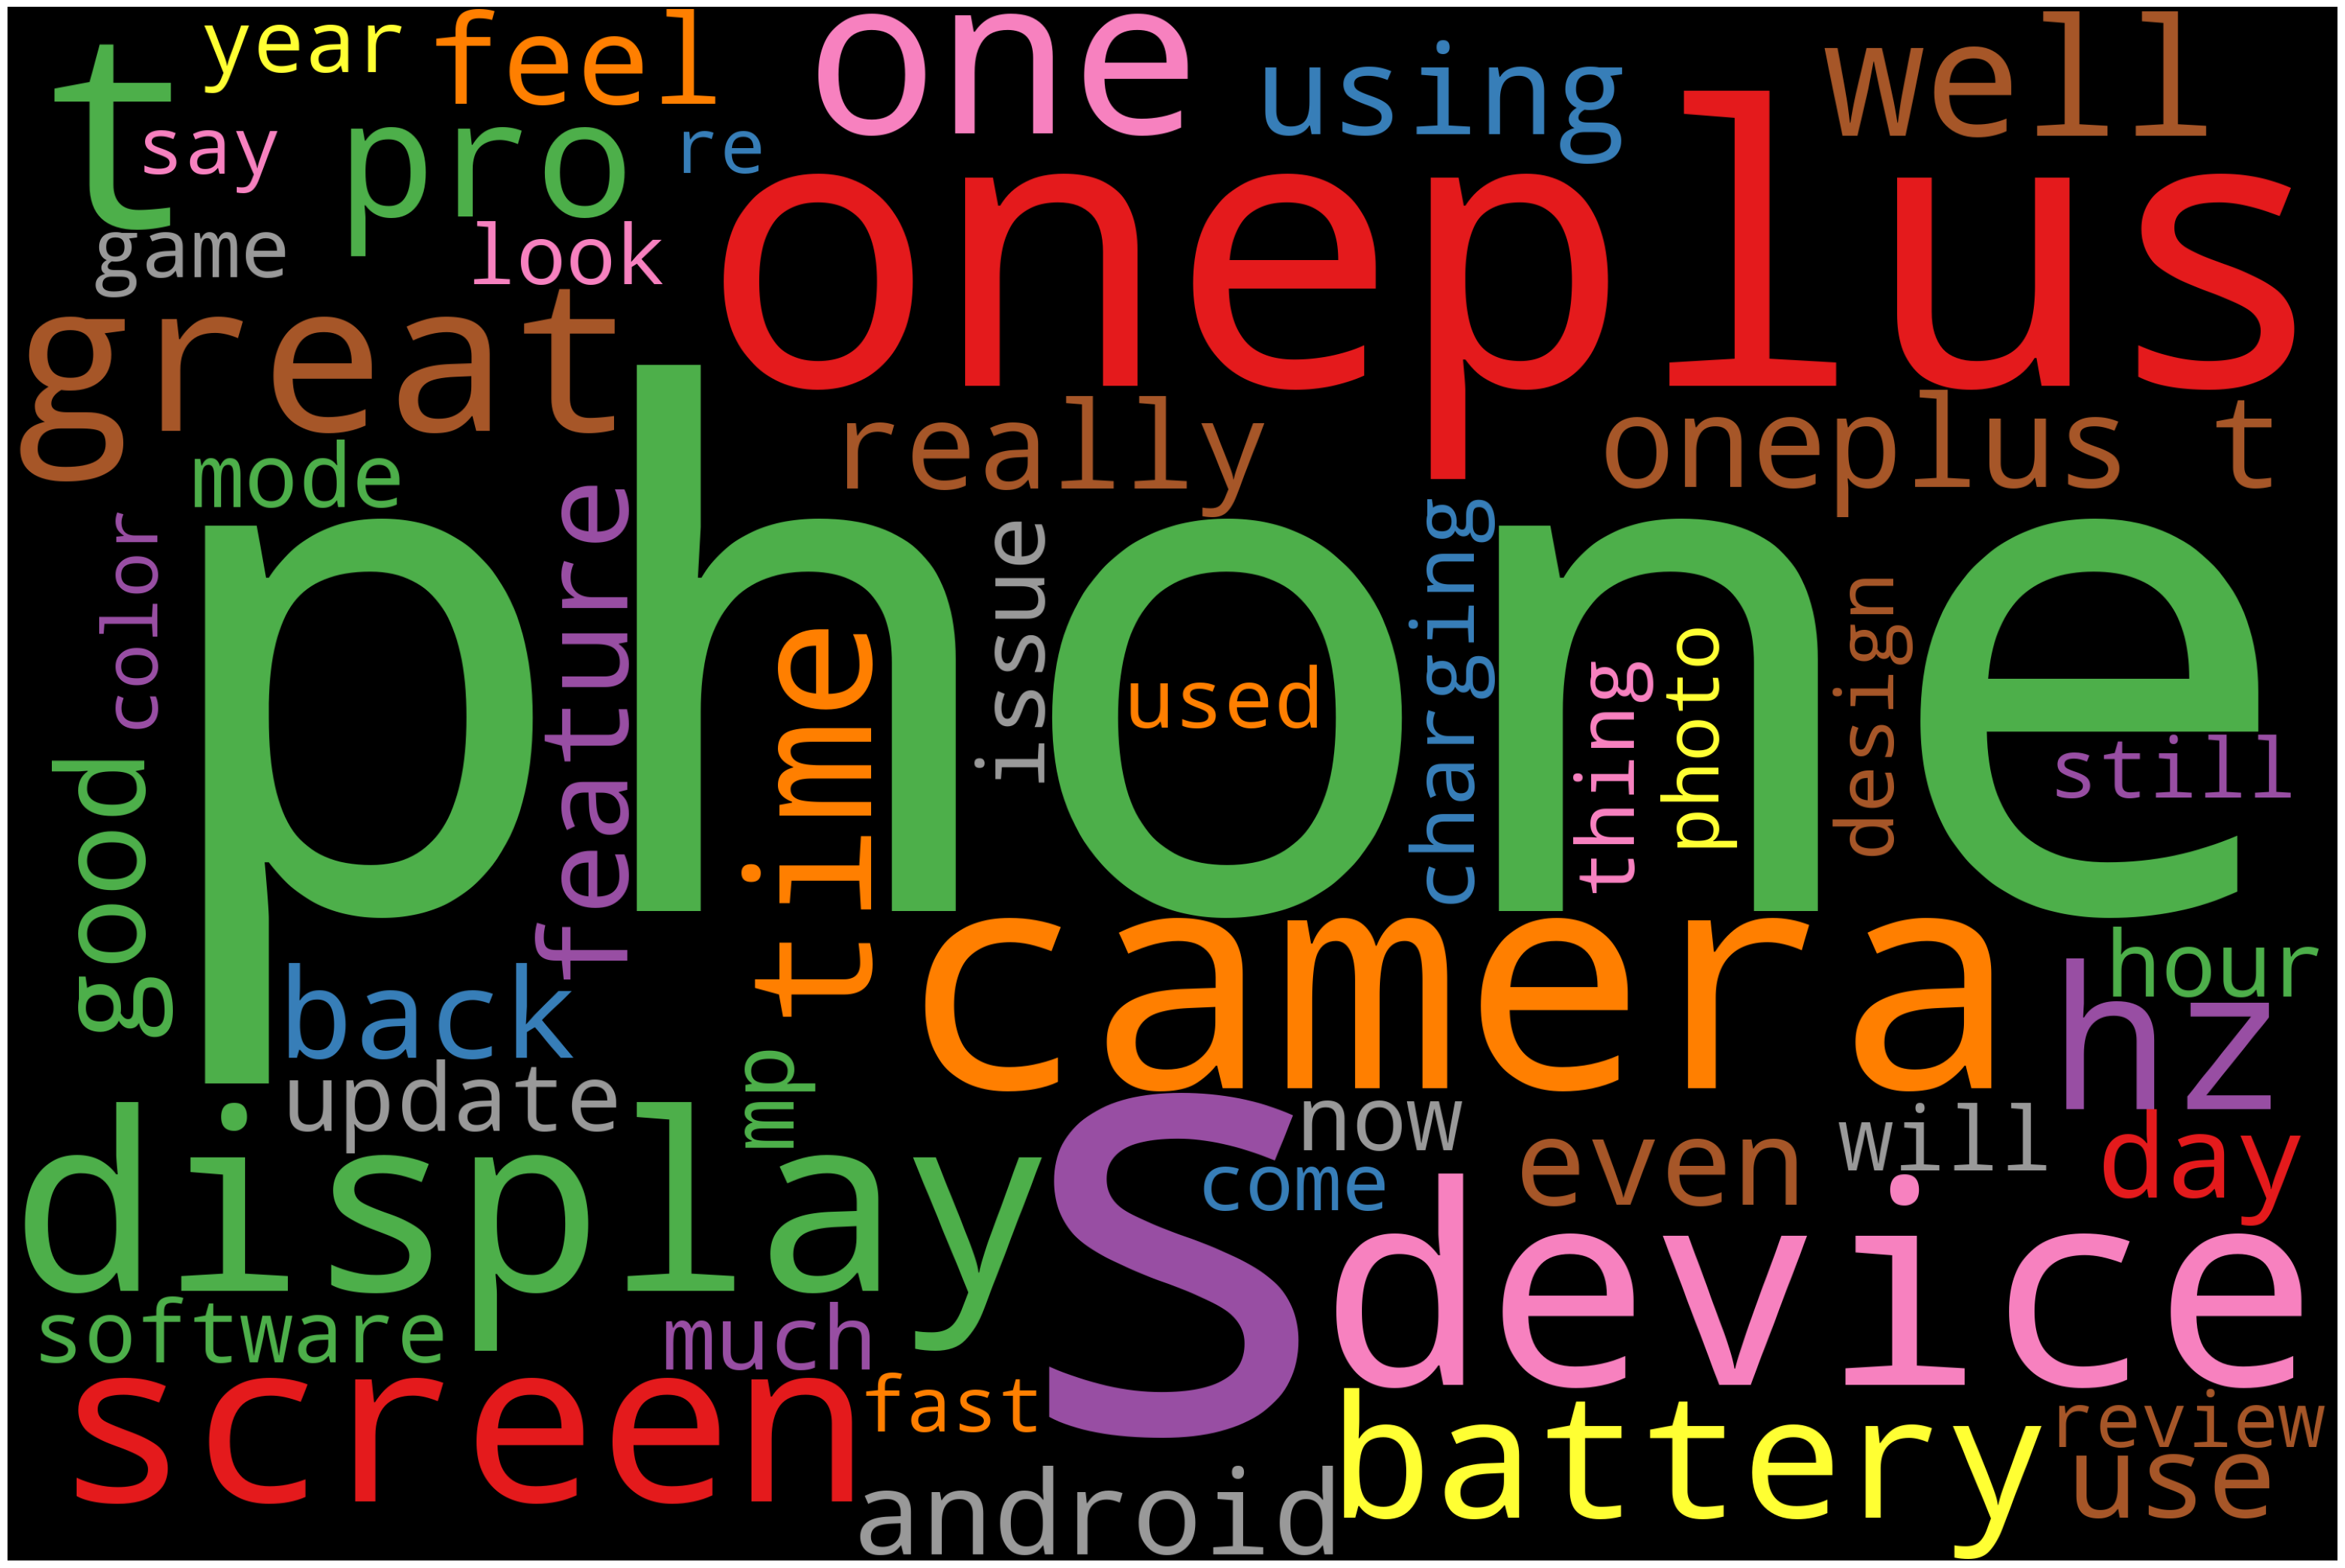

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Define the plot_cloud function
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()  # Display the word cloud

# Define STOPWORDS and txt_upd (assuming you have these defined elsewhere)
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
txt_upd = txt_upd  # Replace with your actual cleaned tweets

# Generate Word Cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=50,
                      colormap='Set1', stopwords=STOPWORDS).generate(txt_upd)

# Call the plot_cloud function to display the word cloud
plot_cloud(wordcloud)

# Named Entity Recognition (NER

In [30]:
import spacy
#Part of Speech (pos) Tagging, NER is Used for recognise the word what typr of word it is 
nlp=spacy.load('en_core_web_sm')

one_block=txt_upd
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

# Emotion Mining

In [31]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [32]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(oneplus_reviews))
sentences[5:15]

['Remember Motorola?',
 'That’s exactly what the Oneplus 7T looks like, and the “Triple Lens” carved right above the, well, triple-lens system, doesn’t help.',
 'At its best, it helps in distinguishing itself from the rest of the lineup.',
 'At worst, it sticks out, literally, like a sore thumb.',
 'That’s not to say that I haven’t grown into it, but given the Oneplus 7T Pro’s more predictable design, it does get me to ask “Why did Oneplus make it look like this?”The phone sports a single USB-C port which is used for charging using Warp CHarge 30T.',
 'The latest update to the charging technology will allow the phone to charge from 0 to 70% in just 30 minutes.',
 'And no, that’s not me advertising the charger.',
 'It really does work that fast.',
 'While wireless charging would have been appreciated, I’m happy with decently fast wired charging if it’s this good.',
 'On the flip side, there is no headphone jack.']

In [33]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,\nDesign – A Familiar Face With a Dash of NewL...
1,Users of older Oneplus phones will instantly r...
2,It has the same teardrop notch that the compan...
3,"And honestly, it doesn’t bother me at all."
4,A notch-less design would have been appreciate...
...,...
320,I recommend this to everyone.
321,Don't ever think to buy K20 or other 855+ chip...
322,No.
323,OnePlus cannot be compared to other brands.


In [34]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [35]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [36]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [37]:
# test that it works
calculate_sentiment(text = 'astound')

astound


3

In [38]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)


Design – A Familiar Face With a Dash of NewLet’s start with the design.
Users of older Oneplus phones will instantly recognize the front side of the phone.
It has the same teardrop notch that the company has provided in every phone since the Oneplus 6T.
And honestly, it doesn’t bother me at all.
A notch-less design would have been appreciated, but that’s reserved for the “Pro” model.But here’s the big twist- rounded triple-camera layout.
Remember Motorola?
That’s exactly what the Oneplus 7T looks like, and the “Triple Lens” carved right above the, well, triple-lens system, doesn’t help.
At its best, it helps in distinguishing itself from the rest of the lineup.
At worst, it sticks out, literally, like a sore thumb.
That’s not to say that I haven’t grown into it, but given the Oneplus 7T Pro’s more predictable design, it does get me to ask “Why did Oneplus make it look like this?”The phone sports a single USB-C port which is used for charging using Warp CHarge 30T.
The latest update to

In [39]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(40)

0     14
1     14
2     18
3      8
4     21
5      2
6     21
7     14
8     10
9     48
10    21
11     8
12     6
13    18
14     9
15     3
16    13
17    26
18    16
19    42
20    19
21    19
22    24
23    15
24    18
25    27
26    14
27    53
28    19
29    25
30    23
31    17
32    28
33    22
34    56
35    10
36    29
37    10
38    23
39    40
Name: word_count, dtype: int64

In [40]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
13,While wireless charging would have been apprec...,8,18
204,Ultra wide photos and video(especially the sup...,8,18
102,Everything is working perfectly except the key...,9,63
136,Got the device fully charged from 15% tot 100%...,9,76
251,"It takes out superb photos,both in daylight an...",9,38
73,With the clean Oxygen OS based on Android 10 &...,10,52
105,"Phone heats up slightly while charging, which ...",13,57
133,Now here is my review broken down in Pros and ...,16,109
135,Everything feels so natural and seamless.The 9...,19,90
253,Only drawback in using GCam is that auxiliary ...,19,71


In [41]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    325.000000
mean       1.298462
std        2.804345
min       -5.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       19.000000
Name: sentiment_value, dtype: float64

In [42]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']>=5].head()

,sentence,sentiment_value,word_count
7,"At its best, it helps in distinguishing itself...",5,14
13,While wireless charging would have been apprec...,8,18
25,"With that said, you can fill up the screen on ...",5,27
42,"I’m no mobile gamer, but when the experience i...",7,45
49,Other things like Night Mode and Reader Mode a...,5,33


In [43]:
sent_df['index']=range(0,len(sent_df))

C:\Users\chaur\AppData\Local\Temp\ipykernel_23096\156920589.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


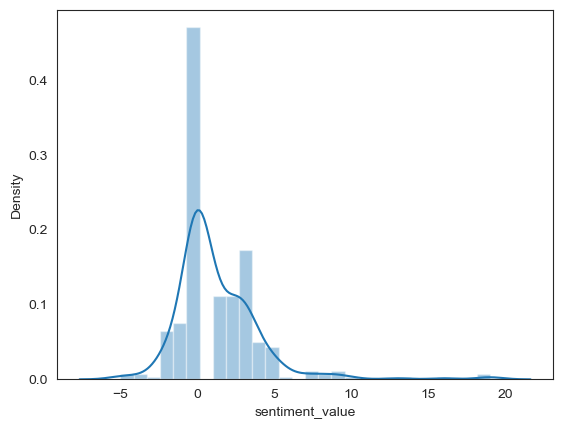

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.distplot(sent_df['sentiment_value'])
plt.show()

<Axes: xlabel='index', ylabel='sentiment_value'>

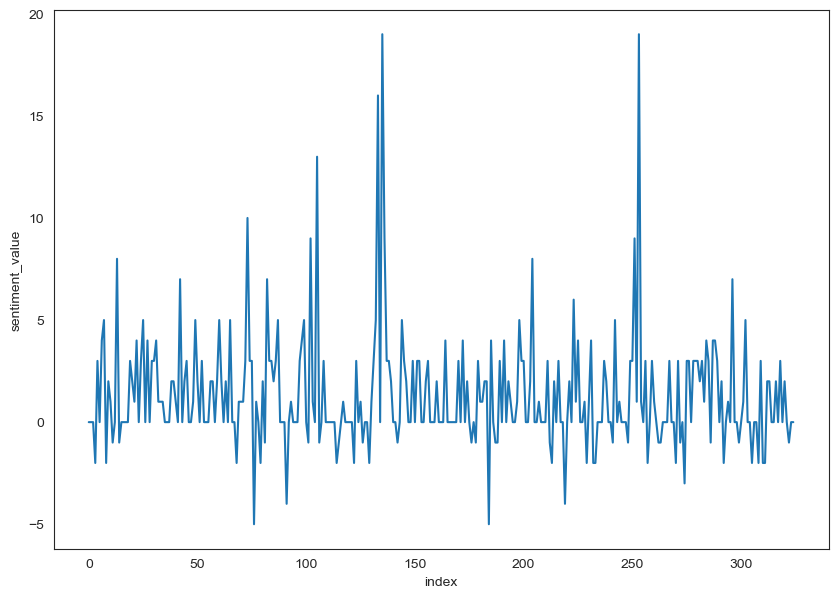

In [45]:
plt.figure(figsize=(10, 7))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

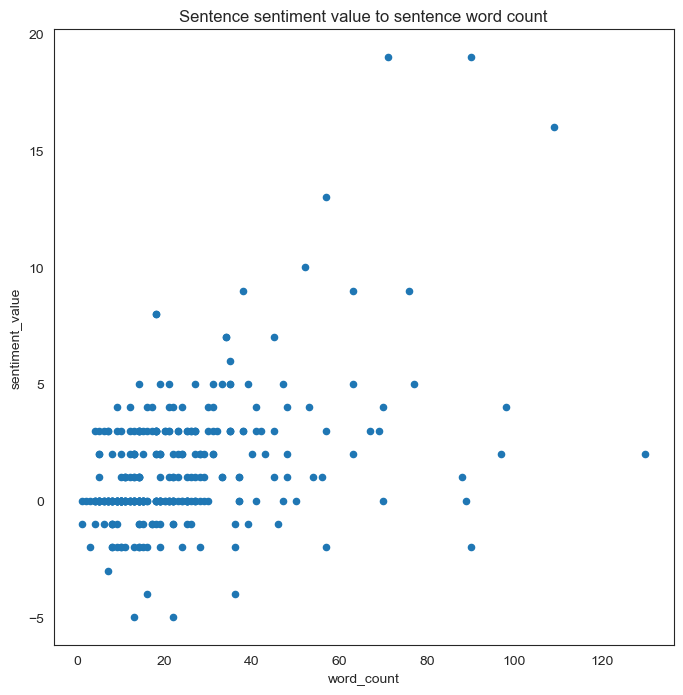

In [46]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')